In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date')
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [16]:
minimo = df['value'].min()
maximo = df['value'].max()

# O sea, hay que dejar todos los datos que estén sobre el 2.5% del mínimo, y bajo el 2.5% del maximo
valor_minimo = minimo + (minimo * 0.025)
valor_maximo = maximo - (maximo * 0.025)

mask_minimo = df['value'] > (valor_minimo)
mask_maximo = df['value'] < (valor_maximo)

mask_total = (mask_minimo) & (mask_maximo)

df = df[mask_total]
df

,value
date,
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


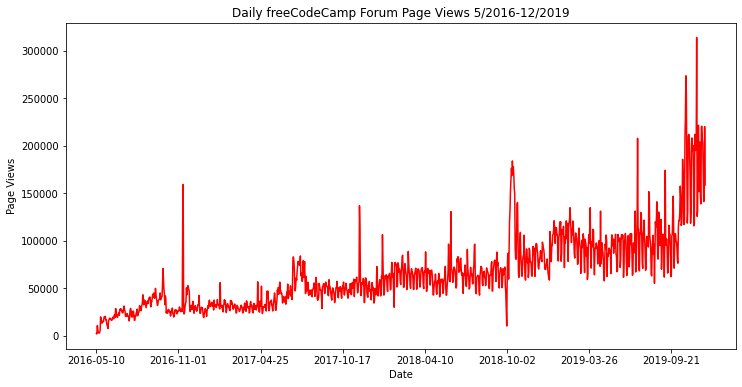

In [40]:
fig, axis = plt.subplots(figsize = (12, 6))

axis.set_xlabel('Date')
axis.set_ylabel('Page Views')
axis.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
axis.plot(df, color = 'red')

ticks_cambiados = axis.get_xticks()[::175] 
axis.set_xticks(ticks_cambiados)


In [41]:
diccionario_total = {}

mes_previo = None
año_previo = None
dias_en_el_mes = 0

for fecha in df.index:

    parse = fecha.split('-')
    año = parse[0]
    mes = parse[1]
    dia = parse[2]

    # Cuando se cambia de año
    if año != año_previo:
        diccionario_total[año] = {f'{mes}': df.loc[fecha]}
        dias_en_el_mes = 1

    # Cuando se cambia de mes
    if mes != mes_previo:
        if mes_previo:
            promedio = diccionario_total[año][mes_previo] / dias_en_el_mes
        
        dias_en_el_mes = 1
        diccionario_total[año][mes] = df.loc[fecha]


    else:
        diccionario_total[año][mes] += df.loc[fecha]
    
    mes_previo = mes
    año_previo = año

diccionario_total

KeyError: None

In [42]:
df.loc['2016-06-11']

value    16098
Name: 2016-06-11, dtype: int64